In [3]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings("ignore")

In [4]:
# Dataset paths
dataset_path = "/Users/mydream/Desktop/PGDSAI/codes/kaggle pjt/Insurance Dataset/"

train_db = pd.read_csv(dataset_path +'train.csv')
test_db = pd.read_csv(dataset_path +'test.csv')


sample_db = pd.read_csv(dataset_path + "sample_submission.csv")

In [5]:
print("Train Data Shape: ", train_db.shape)

print("Test Data Shape: ", test_db.shape)

print("Sample Data Shape: ", sample_db.shape)

Train Data Shape:  (1200000, 21)
Test Data Shape:  (800000, 20)
Sample Data Shape:  (800000, 2)


In [6]:
train_db.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [7]:
train_db.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

Key Factors for Premium are:

1. Age
2. Gender
3. Annual Income
4. Marital Status
5. Number of Dependents
6. Health Score
7. Location
8. Policy Type
9. Previous Claims
10. Insurance Duration
11. Policy Start Date
12. Smoking Status
13. Exercise Frequency

In [8]:
columns = ['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 
        'Insurance Duration', 'Policy Start Date',
       'Smoking Status', 'Exercise Frequency',
        'Premium Amount']

train_db = train_db[columns]

train_db.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Health Score,Location,Policy Type,Previous Claims,Insurance Duration,Policy Start Date,Smoking Status,Exercise Frequency,Premium Amount
0,19.0,Female,10049.0,Married,1.0,22.598761,Urban,Premium,2.0,5.0,2023-12-23 15:21:39.134960,No,Weekly,2869.0
1,39.0,Female,31678.0,Divorced,3.0,15.569731,Rural,Comprehensive,1.0,2.0,2023-06-12 15:21:39.111551,Yes,Monthly,1483.0
2,23.0,Male,25602.0,Divorced,3.0,47.177549,Suburban,Premium,1.0,3.0,2023-09-30 15:21:39.221386,Yes,Weekly,567.0
3,21.0,Male,141855.0,Married,2.0,10.938144,Rural,Basic,1.0,1.0,2024-06-12 15:21:39.226954,Yes,Daily,765.0
4,21.0,Male,39651.0,Single,1.0,20.376094,Rural,Premium,0.0,4.0,2021-12-01 15:21:39.252145,Yes,Weekly,2022.0


In [9]:
train_db.tail()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Health Score,Location,Policy Type,Previous Claims,Insurance Duration,Policy Start Date,Smoking Status,Exercise Frequency,Premium Amount
1199995,36.0,Female,27316.0,Married,0.0,13.772907,Urban,Premium,NaN,3.0,2023-05-03 15:21:39.257696,No,Daily,1303.0
1199996,54.0,Male,35786.0,Divorced,NaN,11.483482,Rural,Comprehensive,NaN,4.0,2022-09-10 15:21:39.134960,No,Weekly,821.0
1199997,19.0,Male,51884.0,Divorced,0.0,14.724469,Suburban,Basic,0.0,6.0,2021-05-25 15:21:39.106582,No,Monthly,371.0
1199998,55.0,Male,NaN,Single,1.0,18.547381,Suburban,Premium,1.0,4.0,2021-09-19 15:21:39.190215,No,Daily,596.0
1199999,21.0,Female,NaN,Divorced,0.0,10.125323,Rural,Premium,0.0,6.0,2020-08-26 15:21:39.155231,Yes,Monthly,2480.0


In [10]:
train_db.isna().sum()

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Insurance Duration           1
Policy Start Date            0
Smoking Status               0
Exercise Frequency           0
Premium Amount               0
dtype: int64

In [11]:
# percent data which is null

(train_db.isna().sum()/train_db.shape[0])*100

Age                      1.558750
Gender                   0.000000
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Health Score             6.173000
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.335750
Insurance Duration       0.000083
Policy Start Date        0.000000
Smoking Status           0.000000
Exercise Frequency       0.000000
Premium Amount           0.000000
dtype: float64

In [12]:
# Since previous claim missing value is more than 30%, we can remove it

train_db.drop("Previous Claims", axis=1, inplace=True)

In [13]:
temp_df = train_db.dropna(axis=0)


In [14]:
temp_df.shape

(953609, 13)

In [15]:
temp_df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Health Score', 'Location', 'Policy Type',
       'Insurance Duration', 'Policy Start Date', 'Smoking Status',
       'Exercise Frequency', 'Premium Amount'],
      dtype='object')

In [16]:
categorical_cols = ['Gender', 'Marital Status', 'Location', 'Policy Type', 'Smoking Status', 'Exercise Frequency']
numerical_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Insurance Duration', 'Premium Amount']

In [17]:
cat_data = temp_df[categorical_cols]
num_data = temp_df.drop(categorical_cols, axis=1)

In [18]:
cat_data

,Gender,Marital Status,Location,Policy Type,Smoking Status,Exercise Frequency
0,Female,Married,Urban,Premium,No,Weekly
1,Female,Divorced,Rural,Comprehensive,Yes,Monthly
2,Male,Divorced,Suburban,Premium,Yes,Weekly
3,Male,Married,Rural,Basic,Yes,Daily
4,Male,Single,Rural,Premium,Yes,Weekly
...,...,...,...,...,...,...
1199992,Female,Married,Urban,Comprehensive,No,Rarely
1199993,Male,Married,Suburban,Comprehensive,No,Rarely
1199994,Male,Single,Rural,Basic,No,Monthly
1199995,Female,Married,Urban,Premium,No,Daily


In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
ohe = OneHotEncoder(drop='first')
cat_enc = ohe.fit_transform(cat_data)


In [21]:
cat_data = pd.DataFrame(cat_enc.toarray(), columns=list(ohe.get_feature_names_out(categorical_cols)))

In [22]:
cat_data.head()

,Gender_Male,Marital Status_Married,Marital Status_Single,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [23]:
# Numerical Data
num_data.head()

,Age,Annual Income,Number of Dependents,Health Score,Insurance Duration,Policy Start Date,Premium Amount
0,19.0,10049.0,1.0,22.598761,5.0,2023-12-23 15:21:39.134960,2869.0
1,39.0,31678.0,3.0,15.569731,2.0,2023-06-12 15:21:39.111551,1483.0
2,23.0,25602.0,3.0,47.177549,3.0,2023-09-30 15:21:39.221386,567.0
3,21.0,141855.0,2.0,10.938144,1.0,2024-06-12 15:21:39.226954,765.0
4,21.0,39651.0,1.0,20.376094,4.0,2021-12-01 15:21:39.252145,2022.0


In [24]:
num_data.drop("Policy Start Date", axis=1, inplace=True)

<Axes: >

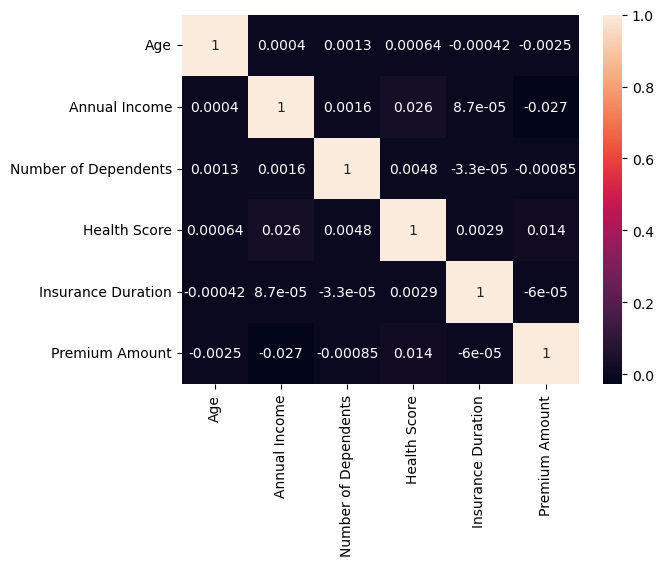

In [25]:
sns.heatmap(num_data.corr(), annot=True)

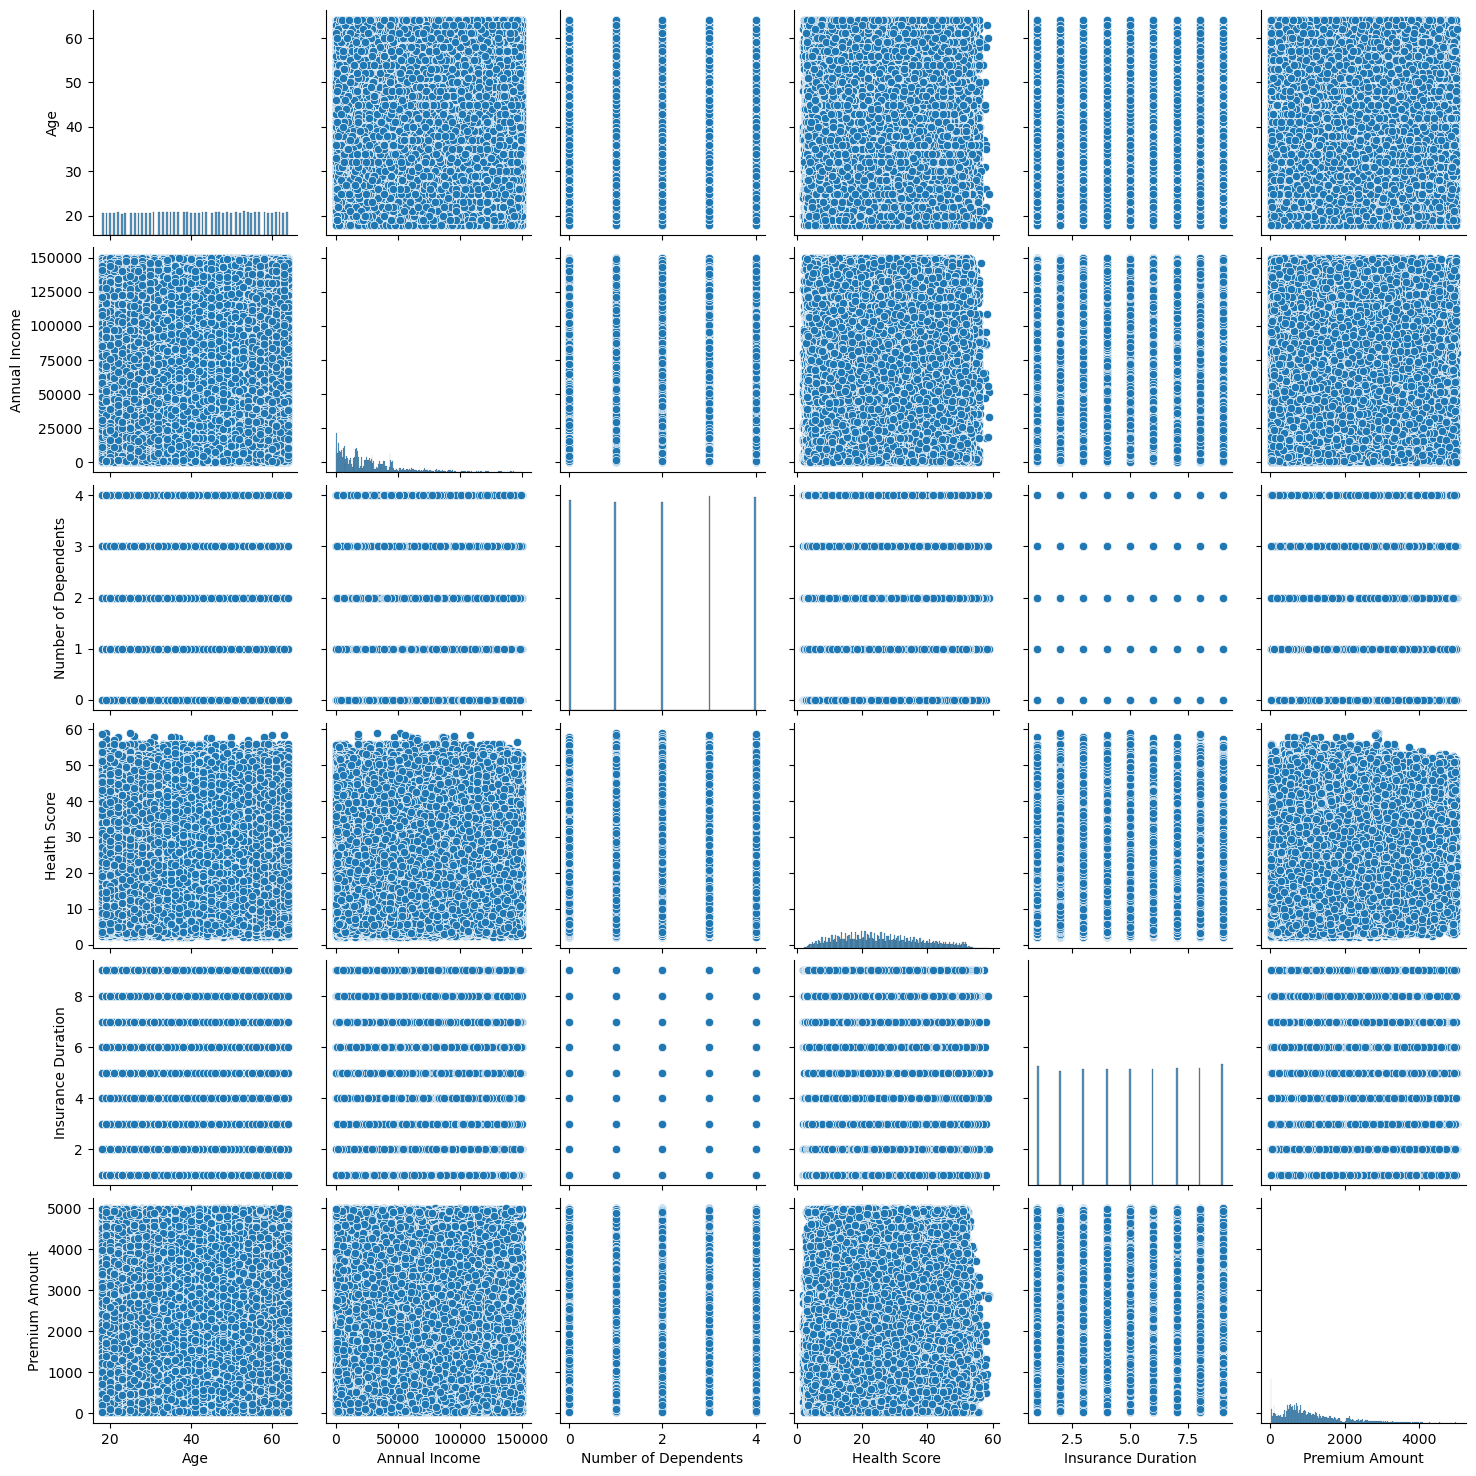

In [26]:
sns.pairplot(num_data)

In [27]:
target_data = num_data["Premium Amount"]
num_data.drop("Premium Amount", axis=1, inplace=True)
num_data.head()

,Age,Annual Income,Number of Dependents,Health Score,Insurance Duration
0,19.0,10049.0,1.0,22.598761,5.0
1,39.0,31678.0,3.0,15.569731,2.0
2,23.0,25602.0,3.0,47.177549,3.0
3,21.0,141855.0,2.0,10.938144,1.0
4,21.0,39651.0,1.0,20.376094,4.0


- health score and insurance duration is directly affecting premium amount.
- Age is likely an important factor in predicting Premium Amount, as age often correlates with health risks and insurance policies' pricing.
  

We need to transform the numerical data to a common scale

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()
num_scaled_data = sc.fit_transform(num_data)
num_scaled_data = pd.DataFrame(num_scaled_data, columns=num_data.columns)
num_scaled_data.head()

,Age,Annual Income,Number of Dependents,Health Score,Insurance Duration
0,-1.635183,-0.709985,-0.713734,-0.244497,-0.006749
1,-0.158451,-0.028479,0.697701,-0.822536,-1.162938
2,-1.339837,-0.219927,0.697701,1.776762,-0.777542
3,-1.487510,3.443081,-0.008016,-1.203418,-1.548335
4,-1.487510,0.222742,-0.713734,-0.427280,-0.392145


In [30]:
# Combining the data
new_data = pd.concat([num_scaled_data, cat_data], axis=1)
new_data.head()

,Age,Annual Income,Number of Dependents,Health Score,Insurance Duration,Gender_Male,Marital Status_Married,Marital Status_Single,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly
0,-1.635183,-0.709985,-0.713734,-0.244497,-0.006749,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.158451,-0.028479,0.697701,-0.822536,-1.162938,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,-1.339837,-0.219927,0.697701,1.776762,-0.777542,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,-1.487510,3.443081,-0.008016,-1.203418,-1.548335,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.487510,0.222742,-0.713734,-0.427280,-0.392145,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


<Axes: >

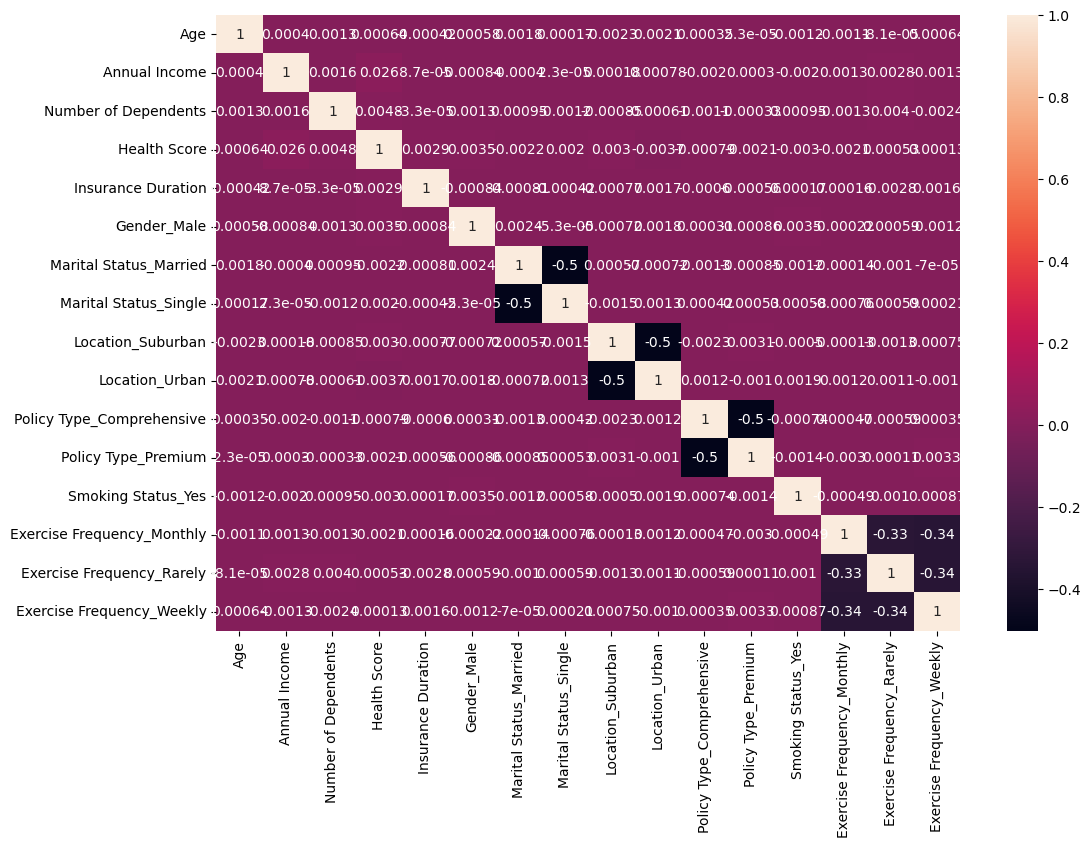

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(new_data.corr(), annot=True)

In [32]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(new_data, target_data, test_size=0.25)

In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Custom RMSLE function
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))
    
# Define models and hyperparameter grids
models_and_parameters = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {'alpha': [0.1, 1.0, 10.0, 100.0]}
    },
    'Lasso Regression': {
        'model': Lasso(),
        'params': {'alpha': [0.01, 0.1, 1.0, 10.0]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [50, 100, 200],
                   'max_depth': [None, 10, 20],
                   'min_samples_split': [2, 5]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [50, 100, 200],
                   'learning_rate': [0.01, 0.1, 0.2],
                   'max_depth': [3, 5, 10]}
    },
    'Support Vector Regression': {
        'model': SVR(),
        'params': {'kernel': ['linear', 'rbf'],
                   'C': [0.1, 1.0, 10.0],
                   'gamma': ['scale', 'auto']}
    }
}

# Perform hyperparameter tuning
results = []
for name, config in models_and_parameters.items():
    print(f"Tuning {name}...")
    
    # Add verbose=2 to GridSearchCV for detailed output
    grid = GridSearchCV(config['model'], config['params'], scoring=make_scorer(rmsle, greater_is_better=False), 
                        cv=5, n_jobs=-1, verbose=2)
    grid.fit(train_x, train_y)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(test_x)
    
    # Evaluate RMSLE and R²
    rmsle_value = rmsle(test_y, y_pred)
    r2_value = r2_score(test_y, y_pred)
    
    print(f"Best Parameters for {name}: {grid.best_params_}")
    print(f"RMSLE for {name}: {rmsle_value}")
    print(f"R² for {name}: {r2_value}")
    
    results.append({
        'Model Name': name,
        'Model': best_model,
        'Best Params': grid.best_params_,
        'RMSLE': -rmsle_value,  # Negating to align with sklearn's scoring convention
        'R²': r2_value
    })


Tuning Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for Linear Regression: {}
RMSLE for Linear Regression: 1.1660734020394874
R² for Linear Regression: 0.0008715704783134326
Tuning Ridge Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for Ridge Regression: {'alpha': 0.1}
RMSLE for Ridge Regression: 1.1660734023131372
R² for Ridge Regression: 0.0008715704941923974
Tuning Lasso Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for Lasso Regression: {'alpha': 0.01}
RMSLE for Lasso Regression: 1.1660742100014108
R² for Lasso Regression: 0.000872351063126886
Tuning Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
# Select the best model based on lowest RMSLE
best_model_name = None
best_model = None
best_params = None
lowest_rmsle = float('inf')

for result in results:
    if abs(result['RMSLE']) < lowest_rmsle:
        lowest_rmsle = abs(result['RMSLE'])
        best_model_name = result['Model Name']
        best_params = result['Best Params']
        best_model = result['Model']

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"Lowest RMSLE: {lowest_rmsle}")

In [ ]:
def test_pipeline(test_data):
    test_cat = test_db[categorical_cols]
    test_num = test_db[numerical_cols[:-1]]
    
    for col in test_cat.columns:  # Iterate over categorical columns
        most_frequent = test_cat[col].mode()[0]
        test_cat[col].fillna(most_frequent, inplace=True)
    
    # Fill missing values in numerical columns with their mean
    for col in test_num.columns:  # Select numerical columns
        mean_value = test_num[col].mean()  # Calculate mean
        test_num[col].fillna(mean_value, inplace=True)
    
    # onehot encoding
    test_cat_enc = ohe.transform(test_cat)
    test_cat_enc_data = pd.DataFrame(test_cat_enc.toarray(), columns=list(ohe.get_feature_names_out(categorical_cols)))
    
    # scaling numerical data
    test_num_scaled = sc.transform(test_num)
    test_num_scaled = pd.DataFrame(test_num_scaled, columns=test_num.columns)
    
    test_new_data = pd.concat([test_num_scaled, test_cat_enc_data], axis=1)
    test_pred = best_model.predict(test_new_data)
    test_data['Predicted Premium'] = test_pred
    return test_data[['id','Predicted Premium']]

In [ ]:
test_pipeline(test_db)